In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline 
import os 
import seaborn as sns 
from scipy.special import softmax 
from scipy.stats import ttest_rel
import pandas as pd 

In [3]:
parcellation_nii=nib.load('/jukebox/griffiths/bert-brains/slumlordreach_data/Schaefer1000_3mm.nii.gz')
parcellation=parcellation_nii.get_fdata().astype('int')


NameError: name 'story' is not defined

In [5]:
layers=nib.load('layerwise_performances.nii').get_fdata()
zs=nib.load('zwise_performances.nii').get_fdata()

In [8]:
layers.shape

(65, 77, 49, 12)

In [13]:
layers_parcels=np.zeros((1000,12))
z_parcels=np.zeros((1000,12))
for p in range(1000):
    layers_parcels[p,:]=layers[np.where(parcellation==p+1)].mean(axis=0)
    z_parcels[p,:]=zs[np.where(parcellation==p+1)].mean(axis=0)

In [16]:
layers_parcels.shape

(1000, 12)

In [19]:
np.save('layer_parcels.npy',layers_parcels)
np.save('z_parcels.npy',z_parcels)

0
1
2
3
4
5
6
7
8
9
10
11


([<matplotlib.axis.YTick at 0x7f4dc4670b10>,
 <a list of 12 Text yticklabel objects>)

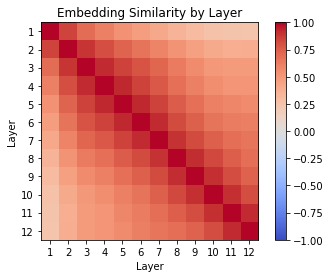

In [10]:
from scipy.stats import pearsonr 
embeddings=[]
for layer in range(12):
    embeddings.append(np.load('data/black/bert-base-uncased/raw_embeddings/black_bert-base-uncased_layer_'+str(layer)+"_activations.npy"))
embeddings=np.asarray(embeddings)
corrs=np.zeros((12,12))
for i in range(12):
    print(i)
    for j in range(12):
        if i!=j: 
            layer1=embeddings[i]
            layer2=embeddings[j]
            c=[]
            for tr in range(534):
                c.append(pearsonr(layer1[tr],layer2[tr])[0])
            corrs[i,j]=np.mean(c)
        else:
            corrs[i,j]=1.0

plt.imshow(corrs,cmap='coolwarm',vmin=-1,vmax=1)
plt.colorbar()
plt.title("Embedding Similarity by Layer")
plt.xlabel("Layer")
plt.ylabel("Layer")
plt.xticks(list(range(12)),list(range(1,13)))
plt.yticks(list(range(12)),list(range(1,13)))

(array([ 8.,  2.,  8., 12., 14., 14., 18., 16., 20., 20.]),
 array([0.24594847, 0.31439207, 0.38283567, 0.45127928, 0.51972288,
        0.58816648, 0.65661008, 0.72505368, 0.79349729, 0.86194089,
        0.93038449]),
 <a list of 10 Patch objects>)

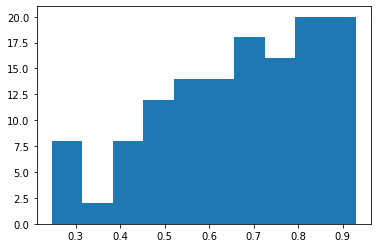

In [11]:
plt.hist(corrs[corrs!=1])

0
1
2
3
4
5
6
7
8
9
10
11


([<matplotlib.axis.YTick at 0x7f4dc4ad1a50>,
 <a list of 12 Text yticklabel objects>)

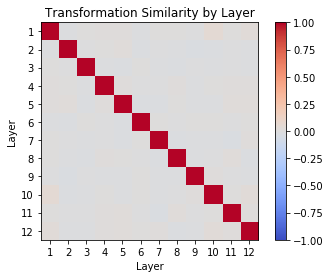

In [3]:
from scipy.stats import pearsonr 
embeddings=[]
for layer in range(12):
    embeddings.append(np.load('data/black/bert-base-uncased/raw_embeddings/black_bert-base-uncased_layer_'+str(layer)+"_z_representations.npy"))
embeddings=np.asarray(embeddings)
corrs=np.zeros((12,12))
for i in range(12):
    print(i)
    for j in range(12):
        if i!=j: 
            layer1=embeddings[i]
            layer2=embeddings[j]
            c=[]
            for tr in range(534):
                c.append(pearsonr(layer1[tr],layer2[tr])[0])
            corrs[i,j]=np.mean(c)
        else:
            corrs[i,j]=1.0

plt.imshow(corrs,cmap='coolwarm',vmin=-1,vmax=1)
plt.colorbar()
plt.title("Transformation Similarity by Layer")
plt.xlabel("Layer")
plt.ylabel("Layer")
plt.xticks(list(range(12)),list(range(1,13)))
plt.yticks(list(range(12)),list(range(1,13)))

(array([18., 18., 30., 20., 30.,  8.,  2.,  4.,  0.,  2.]),
 array([-0.02526094, -0.01775015, -0.01023936, -0.00272857,  0.00478222,
         0.012293  ,  0.01980379,  0.02731458,  0.03482537,  0.04233616,
         0.04984695]),
 <a list of 10 Patch objects>)

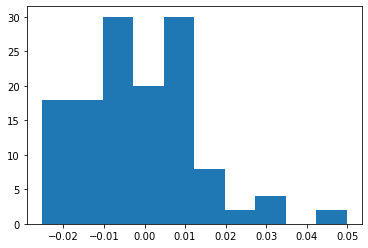

In [9]:
plt.hist(corrs[corrs!=1])

In [23]:
embeddings=[]
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-127', 'sub-279', 
'sub-315', 'sub-314','sub-292', 'sub-311', 'sub-267', 'sub-295', 'sub-305', 'sub-274'] 
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']
rois=['PostTemp','AntTemp','AngG','IFG','MFG','IFGorb','vmPFC','dmPFC','PMC','HG','V1']
embeddings=[]

for story in ['black','slumlordreach']:
    roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI_new.npy')
    if story=='black':
        subs=black_subs
    else:
        subs=slumlordreach_subs
    for sub in subs:
        weights_sub=np.load('/jukebox/griffiths/bert-brains/results/'+story+'/encoding_full/'+sub+"_parcelwise_results_banded_ridge_weights.npy")
        weights_sub_rois=[]
        for roi in range(10):
            weights_sub_rois.append(weights_sub[:,roi_mapping==roi+1].mean(axis=1))
        weights_sub_rois=np.asarray(weights_sub_rois)
        embeddings.append(weights_sub_rois)
embeddings=np.asarray(embeddings).mean(axis=0)
embeddings.shape 
         

(10, 9216)

In [51]:
transformations=[]
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-127', 'sub-279', 
'sub-315', 'sub-314','sub-292', 'sub-311', 'sub-267', 'sub-295', 'sub-305', 'sub-274'] 
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']
rois=['PostTemp','AntTemp','AngG','IFG','MFG','IFGorb','vmPFC','dmPFC','PMC','HG','V1']

for story in ['black','slumlordreach']:
    roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI_new.npy')
    if story=='black':
        subs=black_subs
    else:
        subs=slumlordreach_subs
    for sub in subs:
        weights_sub=np.load('/jukebox/griffiths/bert-brains/results/'+story+'/encoding_full_z/'+sub+"_parcelwise_results_banded_ridge_weights.npy")
        weights_sub_rois=[]
        for roi in range(10):
            weights_sub_rois.append(weights_sub[:,roi_mapping==roi+1].mean(axis=1))
        weights_sub_rois=np.asarray(weights_sub_rois)
        transformations.append(weights_sub_rois)
transformations=np.asarray(transformations).mean(axis=0)
transformations.shape 
         

(10, 9216)

Text(0.5, 1.0, 'Embedddings')

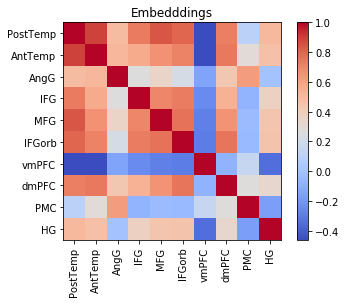

In [32]:
plt.figure()
plt.imshow(np.corrcoef(embeddings),cmap='coolwarm')
plt.colorbar()
plt.xticks(list(range(10)),rois,rotation=90)
plt.yticks(list(range(10)),rois)
plt.title("Embedddings")

Text(0.5, 1.0, 'Transformations')

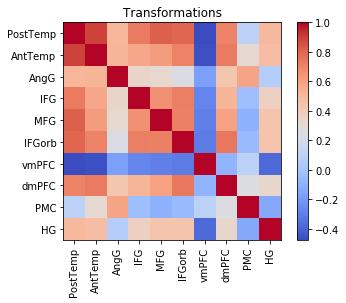

In [33]:
plt.figure()
plt.imshow(np.corrcoef(transformations),cmap='coolwarm')
plt.colorbar()
plt.xticks(list(range(10)),rois,rotation=90)
plt.yticks(list(range(10)),rois)
plt.title("Transformations")

In [35]:
np.corrcoef(transformations)

array([[ 1.        ,  0.89272444,  0.51398738,  0.73176544,  0.81051057,
         0.79686796, -0.47320848,  0.70926967,  0.10071486,  0.50231633],
       [ 0.89272444,  1.        ,  0.52165537,  0.57954714,  0.61999989,
         0.70670119, -0.46145474,  0.73436474,  0.31105462,  0.48006678],
       [ 0.51398738,  0.52165537,  1.        ,  0.33867133,  0.32013681,
         0.23792751, -0.17193595,  0.43579542,  0.58611307,  0.06242946],
       [ 0.73176544,  0.57954714,  0.33867133,  1.        ,  0.66548567,
         0.72185857, -0.2767533 ,  0.52151573, -0.02548264,  0.36787016],
       [ 0.81051057,  0.61999989,  0.32013681,  0.66548567,  1.        ,
         0.7158255 , -0.29132725,  0.59810276, -0.09531997,  0.44653491],
       [ 0.79686796,  0.70670119,  0.23792751,  0.72185857,  0.7158255 ,
         1.        , -0.31107672,  0.74398687, -0.04947362,  0.44325129],
       [-0.47320848, -0.46145474, -0.17193595, -0.2767533 , -0.29132725,
        -0.31107672,  1.        , -0.07616336

In [36]:
np.corrcoef(embeddings)

array([[ 1.        ,  0.89191166,  0.48756705,  0.73488692,  0.84335749,
         0.79878851, -0.46001983,  0.72448607,  0.10088476,  0.50623041],
       [ 0.89191166,  1.        ,  0.51360298,  0.56230402,  0.66249534,
         0.71014918, -0.45468424,  0.7421637 ,  0.29493912,  0.47038711],
       [ 0.48756705,  0.51360298,  1.        ,  0.26832912,  0.35084764,
         0.22874244, -0.14265958,  0.43336489,  0.61858756,  0.00276364],
       [ 0.73488692,  0.56230402,  0.26832912,  1.        ,  0.69578385,
         0.727769  , -0.24227278,  0.54236367, -0.06675383,  0.36971907],
       [ 0.84335749,  0.66249534,  0.35084764,  0.69578385,  1.        ,
         0.76549771, -0.28064946,  0.65288903, -0.03755314,  0.44459236],
       [ 0.79878851,  0.71014918,  0.22874244,  0.727769  ,  0.76549771,
         1.        , -0.29331532,  0.75455244, -0.03918896,  0.4571954 ],
       [-0.46001983, -0.45468424, -0.14265958, -0.24227278, -0.28064946,
        -0.29331532,  1.        , -0.0757707 

In [37]:
weights_sub=np.load('/jukebox/griffiths/bert-brains/results/'+story+'/encoding_full_z/'+sub+"_parcelwise_results_banded_ridge_weights.npy")
weights_sub

array([[-3.60724920e-09, -7.63260508e-08,  2.02581724e-09, ...,
        -4.03828883e-05, -1.89122074e-05, -4.64471149e-06],
       [ 3.21074164e-09,  3.82395975e-08, -1.84058296e-09, ...,
        -1.08049017e-07, -8.74541869e-06,  2.87902902e-06],
       [-5.64076387e-09, -9.94596357e-08, -1.45823047e-09, ...,
         5.10881520e-05,  3.88650940e-05,  2.66196247e-06],
       ...,
       [-9.96828881e-09, -3.89041105e-07, -3.15660634e-09, ...,
         2.85518988e-05,  2.03060051e-05,  3.77944576e-06],
       [-4.57526501e-09, -4.85158302e-07,  2.53999637e-09, ...,
        -1.19419868e-05, -8.85675090e-06,  1.36021679e-06],
       [ 1.83581209e-09, -2.80964068e-07,  3.01729342e-09, ...,
        -1.13304948e-05,  5.84676848e-06,  1.68166594e-07]])

In [48]:
print(embeddings)

[[ 8.96667316e-06  6.74228938e-06 -1.38558110e-06 ...  1.55553971e-05
   3.85271292e-06 -2.29515845e-06]
 [ 5.14183501e-06  4.86806753e-06  8.99938762e-07 ...  1.49036900e-05
   1.79757661e-06  8.74449454e-07]
 [ 6.76017268e-06  8.28755321e-06 -3.06875470e-06 ... -1.35887148e-05
   1.41067564e-06 -3.22229369e-06]
 ...
 [ 1.40309026e-06 -2.96522918e-06 -1.67203419e-06 ...  1.24662021e-05
   1.76240568e-07 -5.42269862e-06]
 [-3.42847211e-06  1.63548131e-07 -1.60477527e-07 ... -1.40101008e-06
   4.60844542e-06  4.80925259e-07]
 [ 7.30150056e-07 -7.73726637e-07 -5.46136305e-07 ...  1.08728963e-06
   8.57118206e-07  9.11978006e-07]]


In [52]:
print(transformations)

[[ 5.73836309e-06 -1.30285480e-06  2.97517662e-05 ... -9.22887786e-06
  -2.07156844e-05  7.91899269e-06]
 [ 1.25267936e-05  8.30763862e-07  2.47662946e-05 ... -4.81907395e-08
  -1.90789460e-05  6.15264066e-06]
 [-6.27544740e-06  2.75713740e-06  2.53494524e-05 ...  6.45092896e-06
  -1.69097889e-05  1.23695626e-05]
 ...
 [ 3.96319676e-06 -1.02691807e-06  1.58861644e-05 ... -4.36845713e-06
  -6.99871636e-06  1.24860186e-06]
 [ 1.04814245e-06  6.62176819e-06  7.07079284e-06 ...  7.76428154e-06
  -5.30209406e-06  6.00502814e-06]
 [ 9.43541192e-06  6.38348060e-06  1.45829289e-05 ... -8.40286715e-06
  -9.08073678e-06  1.28914789e-06]]


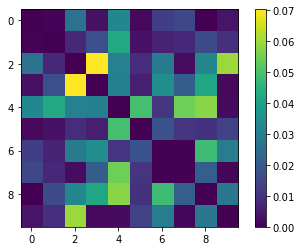

In [55]:
plt.imshow(np.abs(np.corrcoef(embeddings)-np.corrcoef(transformations)))
plt.colorbar()

In [64]:
from scipy.stats import pearsonr 
for i in range(10):
    print(pearsonr(embeddings[i],transformations[i]))

(0.0027638771788032895, 0.7907808867508714)
(0.007179876934359418, 0.49070775224502033)
(-0.014755303286587425, 0.15666015719272247)
(0.006619164447484888, 0.5251932885458167)
(-0.0003446283737171549, 0.9736109214904294)
(0.01344457554276536, 0.19685542481159332)
(-0.011011837798313589, 0.2905001406477487)
(0.008195417538687765, 0.4314770754318661)
(-0.01205466457403392, 0.2472180803928869)
(0.014340854035957749, 0.16863408586962808)


In [59]:
embeddings.shape

(10, 9216)